In [59]:
# This Jupyter Notebook does feature engineering joining all features in all tables.

import matplotlib.pyplot as plt
import pandas as pd
import seaborn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Read employees dataset
df_employee_raw = pd.read_csv('employees4.csv', na_values=['\\N'], on_bad_lines='skip', infer_datetime_format=True, parse_dates=['Date_Joined', 'Date_Resigned', 'Inactive_Date'])
df_employee_raw.info()
print(f'Total employees {str(df_employee_raw["Employee_Code"].nunique())}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Employee_No          1261 non-null   int64         
 1   Employee_Code        1261 non-null   int64         
 2   Name                 1261 non-null   object        
 3   Title                1261 non-null   object        
 4   Address_Line_1       1261 non-null   object        
 5   Address_Line_2       1181 non-null   object        
 6   Address_Line_3       952 non-null    object        
 7   Date_of_Birth        1261 non-null   object        
 8   Gender               1261 non-null   object        
 9   Religion_ID          1261 non-null   int64         
 10  Marital_Status       1170 non-null   object        
 11  Designation_ID       1261 non-null   int64         
 12  Date_Joined          1261 non-null   datetime64[ns]
 13  Date_Resigned        955 non-null

In [10]:
print(f'Earliest join date {str(df_employee_raw["Date_Joined"].min())}')
print(f'Latest join date {str(df_employee_raw["Date_Joined"].max())}')

Earliest join date 1988-01-27 00:00:00
Latest join date 2022-12-20 00:00:00


In [61]:
# Clean employee table
# Drop Employee_Code because it's not referenced in other tables.
# Other fields are dropped
df_employee = df_employee_raw.drop(['Employee_Code', 'Name', 'Address_Line_1', 'Address_Line_2', 'Address_Line_3',
                                    'Reporting_emp_1', 'Reporting_emp_2', 'Title', 'Religion', 'Religion_ID', 'Designation_ID'], axis=1)
df_employee

,Employee_No,Date_of_Birth,Gender,Marital_Status,Date_Joined,Date_Resigned,Status,Status_Reason,Inactive_Date,Employment_Category,Employment_Type,Designation
0,347,1965-03-05,Male,Married,1993-12-08,NaN,Active,NaN,NaN,Staff,Permanant,Driver
1,348,1973-05-15,Male,Married,1995-03-14,NaN,Active,NaN,NaN,Staff,Permanant,Driver
2,349,1974-12-06,Male,Married,1988-01-27,2021-06-28,Inactive,RESIGN,2021-06-28,Staff,Permanant,Account Clerk
3,351,1974-04-30,Female,Married,1999-10-01,2022-01-31,Inactive,Resign,2022-01-31,Staff,Permanant,Purchasing Officer
4,352,1980-07-22,Male,Married,2001-01-26,NaN,Active,NaN,NaN,Staff,Permanant,Store Keeper
...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2836,1993-03-23,Female,Single,2022-11-01,2022-12-22,Inactive,Resign,2022-12-22,Staff,Contarct Basis,Account Executive
1257,2890,1994-10-06,Male,Single,2022-11-21,0000-00-00,Active,NaN,0000-00-00,Staff,Contarct Basis,Quantity Surveyor
1258,2972,1997-01-02,Male,Single,2022-12-05,NaN,Active,NaN,NaN,Staff,Contarct Basis,Software Developer
1259,2973,1990-08-16,Male,Single,2022-12-08,0000-00-00,Active,NaN,0000-00-00,Staff,Contarct Basis,Quantity Surveyor


In [115]:
3# This Jupyter Notebook does descriptive analysis on Salary table.

# Read salary dataset
df_salary_raw = pd.read_csv('Salary.csv')
df_salary_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208796 entries, 0 to 208795
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Employee_No    208796 non-null  int64  
 1   DeductionType  208796 non-null  int64  
 2   FactorName     208796 non-null  object 
 3   Amount         208796 non-null  float64
 4   year           208796 non-null  int64  
 5   month          208796 non-null  int64  
 6   SiteNo         208078 non-null  float64
 7   Area           208796 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 12.7+ MB


In [177]:
New_sal_Earnings = df_salary_raw[df_salary_raw['DeductionType'] == 0 ].groupby(['Employee_No']).sum()

Earnings = New_sal_Earnings.drop(['DeductionType', 'year', 'month', 'SiteNo'], axis=1)
Earnings = Earnings.rename(columns={'Amount': 'Earnings'})
Earnings

Deductions = df_salary_raw[df_salary_raw['DeductionType'] == 1].groupby(['Employee_No']).sum()
Deductions = Deductions.drop(['DeductionType', 'year', 'month', 'SiteNo'], axis=1)
Deductions = Deductions.rename(columns={'Amount': 'Deductions'})

Salary = pd.merge(Earnings, Deductions, on='Employee_No', how='left')

Salary

,Earnings,Deductions
Employee_No,,
347,660920.74,43101.00
348,1111986.50,46124.20
351,305889.36,32417.50
352,634538.33,65659.42
354,1217481.58,84429.00
...,...,...
3043,24310.00,NaN
3044,26010.00,25.00
3045,26100.00,25.00


In [149]:
employee_sal = pd.merge(df_employee, Salary, on='Employee_No', how='left')
employee_sal

,Employee_No,Date_of_Birth,Gender,Marital_Status,Date_Joined,Date_Resigned,Status,Status_Reason,Inactive_Date,Employment_Category,Employment_Type,Designation,Earnings,Deductions
0,347,1965-03-05,Male,Married,1993-12-08,NaN,Active,NaN,NaN,Staff,Permanant,Driver,660920.74,43101.00
1,348,1973-05-15,Male,Married,1995-03-14,NaN,Active,NaN,NaN,Staff,Permanant,Driver,1111986.50,46124.20
2,349,1974-12-06,Male,Married,1988-01-27,2021-06-28,Inactive,RESIGN,2021-06-28,Staff,Permanant,Account Clerk,NaN,NaN
3,351,1974-04-30,Female,Married,1999-10-01,2022-01-31,Inactive,Resign,2022-01-31,Staff,Permanant,Purchasing Officer,305889.36,32417.50
4,352,1980-07-22,Male,Married,2001-01-26,NaN,Active,NaN,NaN,Staff,Permanant,Store Keeper,634538.33,65659.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2836,1993-03-23,Female,Single,2022-11-01,2022-12-22,Inactive,Resign,2022-12-22,Staff,Contarct Basis,Account Executive,100000.00,25650.00
1257,2890,1994-10-06,Male,Single,2022-11-21,0000-00-00,Active,NaN,0000-00-00,Staff,Contarct Basis,Quantity Surveyor,140000.00,43716.66
1258,2972,1997-01-02,Male,Single,2022-12-05,NaN,Active,NaN,NaN,Staff,Contarct Basis,Software Developer,60000.00,5518.33
1259,2973,1990-08-16,Male,Single,2022-12-08,0000-00-00,Active,NaN,0000-00-00,Staff,Contarct Basis,Quantity Surveyor,160000.00,17783.33


In [17]:
# Read leaves dataset, filter out special leave categories.
df_leaves = pd.read_csv('leaves_clean.csv')
df_leaves = df_leaves.rename(columns={'leave_date': 'Leave_Date',
                                      'Type': 'Leave_Factor',
                                      'Applied Date': 'Applied_Date',
                                      'leave_leave_date': 'Lieu_Leave_Date',
                                      'Remarks': 'Remarks',
                                      'apply_type': 'Leave_Category'})
df_leaves_type_map = {'Half Day': 0.5, 'Full Day': 1}
df_leaves['Leave_Factor'] = df_leaves['Leave_Factor'].map(df_leaves_type_map)
df_leaves_legit = pd.DataFrame(df_leaves.loc[(df_leaves['Leave_Category'] != 'Liue Leave') & (df_leaves['Leave_Category'] != 'Curfew') & (df_leaves['Leave_Category'] != 'Sat Holiday') & (df_leaves['Leave_Category'] != 'Special Leave')])
df_leaves_summary_temp = df_leaves.groupby('Employee_No')['Leave_Factor'].sum()
df_leaves_summary = pd.DataFrame({'Employee_No': df_leaves_summary_temp.index, 'Leave_Count':  df_leaves_summary_temp.values})
df_leaves_summary.head()
#df_leaves_summary

,Employee_No,Leave_Count
0,347,52.5
1,348,21.5
2,351,57.0
3,352,105.5
4,354,79.5


In [184]:
New_sal_Dayscount = df_salary_raw[(df_salary_raw['FactorName'] == 'Total Working Days') ]
New_sal_Dayscount1 = New_sal_Dayscount.groupby(['Employee_No']).count()
New_sal_Dayscount1 = New_sal_Dayscount1.drop(['DeductionType', 'year', 'month', 'SiteNo', 'FactorName', 'Area'], axis=1)
New_sal_Dayscount1 = New_sal_Dayscount1.rename(columns={'Amount': 'Monthscount'})

employee_sal_Leave_mCount = pd.merge(employee_sal, New_sal_Dayscount1, on='Employee_No', how='left')

New_sal_Total1 = New_sal_Dayscount.groupby(['Employee_No']).sum()
New_sal_Total1 = New_sal_Total1.drop(['DeductionType', 'year', 'month', 'SiteNo'], axis=1)
New_sal_Total1 = New_sal_Total1.rename(columns={'Amount': 'TotalWorkedDays'})



employee_sal_Leave_mCount1 = pd.merge(employee_sal_Leave_mCount, New_sal_Total1, on='Employee_No', how='left')
#df_salary_raw['FactorName'].value_counts().head()
employee_sal_Leave_mCount1

,Employee_No,Date_of_Birth,Gender,Marital_Status,Date_Joined,Date_Resigned,Status,Status_Reason,Inactive_Date,Employment_Category,Employment_Type,Designation,Earnings,Deductions,Monthscount,TotalWorkedDays
0,347,1965-03-05,Male,Married,1993-12-08,NaN,Active,NaN,NaN,Staff,Permanant,Driver,660920.74,43101.00,18.0,374.50
1,348,1973-05-15,Male,Married,1995-03-14,NaN,Active,NaN,NaN,Staff,Permanant,Driver,1111986.50,46124.20,18.0,441.50
2,349,1974-12-06,Male,Married,1988-01-27,2021-06-28,Inactive,RESIGN,2021-06-28,Staff,Permanant,Account Clerk,NaN,NaN,NaN,NaN
3,351,1974-04-30,Female,Married,1999-10-01,2022-01-31,Inactive,Resign,2022-01-31,Staff,Permanant,Purchasing Officer,305889.36,32417.50,6.0,87.75
4,352,1980-07-22,Male,Married,2001-01-26,NaN,Active,NaN,NaN,Staff,Permanant,Store Keeper,634538.33,65659.42,17.0,360.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2836,1993-03-23,Female,Single,2022-11-01,2022-12-22,Inactive,Resign,2022-12-22,Staff,Contarct Basis,Account Executive,100000.00,25650.00,2.0,37.00
1257,2890,1994-10-06,Male,Single,2022-11-21,0000-00-00,Active,NaN,0000-00-00,Staff,Contarct Basis,Quantity Surveyor,140000.00,43716.66,2.0,35.50
1258,2972,1997-01-02,Male,Single,2022-12-05,NaN,Active,NaN,NaN,Staff,Contarct Basis,Software Developer,60000.00,5518.33,1.0,20.00
1259,2973,1990-08-16,Male,Single,2022-12-08,0000-00-00,Active,NaN,0000-00-00,Staff,Contarct Basis,Quantity Surveyor,160000.00,17783.33,2.0,43.00


In [197]:
employee_sal_Leave = pd.merge(employee_sal_Leave_mCount1, df_leaves_summary, on='Employee_No', how='left')
employee_sal_Leave['Leave_Count'].fillna(0, inplace=True)
employee_sal_Leave['Earnings'].fillna(0, inplace=True)
employee_sal_Leave['Deductions'].fillna(0, inplace=True)
employee_sal_Leave['Monthscount'].fillna(0, inplace=True)
employee_sal_Leave['TotalWorkedDays'].fillna(0, inplace=True)

employee_sal_Leave

,Employee_No,Date_of_Birth,Gender,Marital_Status,Date_Joined,Date_Resigned,Status,Status_Reason,Inactive_Date,Employment_Category,Employment_Type,Designation,Earnings,Deductions,Monthscount,TotalWorkedDays,Leave_Count
0,347,1965-03-05,Male,Married,1993-12-08,NaN,Active,NaN,NaN,Staff,Permanant,Driver,660920.74,43101.00,18.0,374.50,52.5
1,348,1973-05-15,Male,Married,1995-03-14,NaN,Active,NaN,NaN,Staff,Permanant,Driver,1111986.50,46124.20,18.0,441.50,21.5
2,349,1974-12-06,Male,Married,1988-01-27,2021-06-28,Inactive,RESIGN,2021-06-28,Staff,Permanant,Account Clerk,0.00,0.00,0.0,0.00,0.0
3,351,1974-04-30,Female,Married,1999-10-01,2022-01-31,Inactive,Resign,2022-01-31,Staff,Permanant,Purchasing Officer,305889.36,32417.50,6.0,87.75,57.0
4,352,1980-07-22,Male,Married,2001-01-26,NaN,Active,NaN,NaN,Staff,Permanant,Store Keeper,634538.33,65659.42,17.0,360.50,105.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2836,1993-03-23,Female,Single,2022-11-01,2022-12-22,Inactive,Resign,2022-12-22,Staff,Contarct Basis,Account Executive,100000.00,25650.00,2.0,37.00,5.0
1257,2890,1994-10-06,Male,Single,2022-11-21,0000-00-00,Active,NaN,0000-00-00,Staff,Contarct Basis,Quantity Surveyor,140000.00,43716.66,2.0,35.50,9.0
1258,2972,1997-01-02,Male,Single,2022-12-05,NaN,Active,NaN,NaN,Staff,Contarct Basis,Software Developer,60000.00,5518.33,1.0,20.00,4.0
1259,2973,1990-08-16,Male,Single,2022-12-08,0000-00-00,Active,NaN,0000-00-00,Staff,Contarct Basis,Quantity Surveyor,160000.00,17783.33,2.0,43.00,2.0


In [226]:
df_attendance_raw = pd.read_csv('attendance.csv')
df_attendance = df_attendance_raw.dropna(subset=['Hourly_Time'])
#df_attendance = df_attendance_raw[df_attendance_raw['Hourly_Time'] > 3.5]

df_attendance.dropna(subset=['Hourly_Time'], inplace=True)
df_attendance_raw['in_time'] = df_attendance_raw['in_time'].apply(lambda x: pd.to_datetime(x, format='%H:%M:%S'))

df_attendance_raw['Shift_Start'] = df_attendance_raw['Shift_Start'].apply(lambda x: pd.to_datetime(x, format='%H:%M:%S'))

df_attendance_raw['Delays'] = (df_attendance_raw['Shift_Start'] - df_attendance_raw['in_time']).dt.seconds
df_attendance_raw['Delays'] = np.where(df_attendance_raw['Delays'] > 0, 1, 0)

df_attendance_raw.head()


C:\Users\sl404\AppData\Local\Temp\ipykernel_13724\242263557.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_attendance_raw = pd.read_csv('attendance.csv')


,id,project_code,date,out_date,employee_no,in_time,out_time,Hourly_Time,Shift_Start,Shift_End,Delays
0,280220,100.0,2/1/2021,2/1/2021,1272,1900-01-01 08:30:00,17:00:00,8.5,1900-01-01 08:30:00,17:00:00,0
1,280307,1.0,2/1/2021,2/1/2021,1539,1900-01-01 08:30:00,17:00:00,8.5,1900-01-01 08:30:00,17:00:00,0
2,280312,1.0,2/1/2021,2/1/2021,1540,1900-01-01 07:45:00,17:00:00,9.25,1900-01-01 08:30:00,17:00:00,1
3,280385,100.0,2/1/2021,2/1/2021,1273,1900-01-01 08:00:00,18:00:00,10,1900-01-01 08:30:00,17:00:00,1
4,322526,1.0,2/1/2021,2/1/2021,573,1900-01-01 23:22:28,23:22:28,0,1900-01-01 08:30:00,17:00:00,1


In [218]:
df_attendance_raw = df_attendance_raw.rename(columns={'Delays': 'NoLateDays'})
df_attendance_delay = df_attendance_raw.groupby('Employee_No')['NoLateDays'].sum()


df_employee_final = pd.merge(employee_sal_Leave, df_attendance_delay, on='Employee_No', how='left')

df_employee_final

,Employee_No,Date_of_Birth,Gender,Marital_Status,Date_Joined,Date_Resigned,Status,Status_Reason,Inactive_Date,Employment_Category,Employment_Type,Designation,Earnings,Deductions,Monthscount,TotalWorkedDays,Leave_Count,NoLateDays
0,347,1965-03-05,Male,Married,1993-12-08,NaN,Active,NaN,NaN,Staff,Permanant,Driver,660920.74,43101.00,18.0,374.50,52.5,472.0
1,348,1973-05-15,Male,Married,1995-03-14,NaN,Active,NaN,NaN,Staff,Permanant,Driver,1111986.50,46124.20,18.0,441.50,21.5,609.0
2,349,1974-12-06,Male,Married,1988-01-27,2021-06-28,Inactive,RESIGN,2021-06-28,Staff,Permanant,Account Clerk,0.00,0.00,0.0,0.00,0.0,69.0
3,351,1974-04-30,Female,Married,1999-10-01,2022-01-31,Inactive,Resign,2022-01-31,Staff,Permanant,Purchasing Officer,305889.36,32417.50,6.0,87.75,57.0,139.0
4,352,1980-07-22,Male,Married,2001-01-26,NaN,Active,NaN,NaN,Staff,Permanant,Store Keeper,634538.33,65659.42,17.0,360.50,105.5,557.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2836,1993-03-23,Female,Single,2022-11-01,2022-12-22,Inactive,Resign,2022-12-22,Staff,Contarct Basis,Account Executive,100000.00,25650.00,2.0,37.00,5.0,38.0
1257,2890,1994-10-06,Male,Single,2022-11-21,0000-00-00,Active,NaN,0000-00-00,Staff,Contarct Basis,Quantity Surveyor,140000.00,43716.66,2.0,35.50,9.0,41.0
1258,2972,1997-01-02,Male,Single,2022-12-05,NaN,Active,NaN,NaN,Staff,Contarct Basis,Software Developer,60000.00,5518.33,1.0,20.00,4.0,24.0
1259,2973,1990-08-16,Male,Single,2022-12-08,0000-00-00,Active,NaN,0000-00-00,Staff,Contarct Basis,Quantity Surveyor,160000.00,17783.33,2.0,43.00,2.0,22.0


In [213]:
# removed activie employees who recently join (<6) no enough data to train the model to decide they are early attrition or not

df_employee_final.drop(df_employee_final[(df_employee_final['Monthscount'] < 6) & (df_employee_final['Status'] == 'Active')].index, inplace=True)

df_employee_final

,Employee_No,Date_of_Birth,Gender,Marital_Status,Date_Joined,Date_Resigned,Status,Status_Reason,Inactive_Date,Employment_Category,Employment_Type,Designation,Earnings,Deductions,Monthscount,TotalWorkedDays,Leave_Count,Delays
0,347,1965-03-05,Male,Married,1993-12-08,NaN,Active,NaN,NaN,Staff,Permanant,Driver,660920.74,43101.00,18.0,374.50,52.5,472.0
1,348,1973-05-15,Male,Married,1995-03-14,NaN,Active,NaN,NaN,Staff,Permanant,Driver,1111986.50,46124.20,18.0,441.50,21.5,609.0
2,349,1974-12-06,Male,Married,1988-01-27,2021-06-28,Inactive,RESIGN,2021-06-28,Staff,Permanant,Account Clerk,0.00,0.00,0.0,0.00,0.0,69.0
3,351,1974-04-30,Female,Married,1999-10-01,2022-01-31,Inactive,Resign,2022-01-31,Staff,Permanant,Purchasing Officer,305889.36,32417.50,6.0,87.75,57.0,139.0
4,352,1980-07-22,Male,Married,2001-01-26,NaN,Active,NaN,NaN,Staff,Permanant,Store Keeper,634538.33,65659.42,17.0,360.50,105.5,557.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,2696,1992-05-23,Female,Married,2022-08-22,2022-08-24,Inactive,Left,2022-08-24,Staff,Contarct Basis,Account Executive,0.00,0.00,0.0,0.00,8.5,1.0
1251,2769,0000-00-00,Male,Married,2022-10-03,2022-10-07,Inactive,Left,2022-10-07,Staff,Contarct Basis,Account Executive,70000.00,61199.99,1.0,5.00,0.0,5.0
1253,2812,1958-09-29,Male,Married,2022-10-17,2022-10-17,Inactive,resign,2022-10-17,Staff,Contarct Basis,Welder,49257.81,27800.00,1.0,11.00,2.0,12.0
1254,2830,1997-10-29,Female,Single,2022-10-24,2022-10-27,Inactive,Resign,2022-10-27,Staff,Contarct Basis,Trainee Data Entry Operator,20000.00,18160.00,1.0,1.50,2.5,2.0


In [208]:
# Removed employees who resigned before implemting the payroll who did not receive any earning during considered time period
df_employee_final.drop(df_employee_final[(df_employee_final['Earnings'] == 0)].index, inplace=True)
df_employee_final



,Employee_No,Date_of_Birth,Gender,Marital_Status,Date_Joined,Date_Resigned,Status,Status_Reason,Inactive_Date,Employment_Category,Employment_Type,Designation,Earnings,Deductions,Monthscount,TotalWorkedDays,Leave_Count,Delays
0,347,1965-03-05,Male,Married,1993-12-08,0,Active,0,0,Staff,Permanant,Driver,660920.74,43101.00,18.0,374.50,52.5,472.0
1,348,1973-05-15,Male,Married,1995-03-14,0,Active,0,0,Staff,Permanant,Driver,1111986.50,46124.20,18.0,441.50,21.5,609.0
3,351,1974-04-30,Female,Married,1999-10-01,2022-01-31,Inactive,Resign,2022-01-31,Staff,Permanant,Purchasing Officer,305889.36,32417.50,6.0,87.75,57.0,139.0
4,352,1980-07-22,Male,Married,2001-01-26,0,Active,0,0,Staff,Permanant,Store Keeper,634538.33,65659.42,17.0,360.50,105.5,557.0
6,354,1969-05-10,Male,Married,2003-11-10,0000-00-00,Active,0,0000-00-00,Staff,Permanant,Technical Officer,1217481.58,84429.00,17.0,403.00,79.5,565.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,2662,1996-09-06,Female,Single,2022-08-02,2022-10-14,Inactive,Resign,2022-10-14,Staff,Contarct Basis,Account Executive,150000.00,43490.02,3.0,48.50,9.0,49.0
1251,2769,0000-00-00,Male,Married,2022-10-03,2022-10-07,Inactive,Left,2022-10-07,Staff,Contarct Basis,Account Executive,70000.00,61199.99,1.0,5.00,0.0,5.0
1253,2812,1958-09-29,Male,Married,2022-10-17,2022-10-17,Inactive,resign,2022-10-17,Staff,Contarct Basis,Welder,49257.81,27800.00,1.0,11.00,2.0,12.0
1254,2830,1997-10-29,Female,Single,2022-10-24,2022-10-27,Inactive,Resign,2022-10-27,Staff,Contarct Basis,Trainee Data Entry Operator,20000.00,18160.00,1.0,1.50,2.5,2.0


In [214]:
# Removed employees who worked less than 5 days as they are daypay employee/tempory employee
df_employee_final.drop(df_employee_final[(df_employee_final['TotalWorkedDays'] <= 5)].index, inplace=True)
df_employee_final


,Employee_No,Date_of_Birth,Gender,Marital_Status,Date_Joined,Date_Resigned,Status,Status_Reason,Inactive_Date,Employment_Category,Employment_Type,Designation,Earnings,Deductions,Monthscount,TotalWorkedDays,Leave_Count,Delays
0,347,1965-03-05,Male,Married,1993-12-08,NaN,Active,NaN,NaN,Staff,Permanant,Driver,660920.74,43101.00,18.0,374.50,52.5,472.0
1,348,1973-05-15,Male,Married,1995-03-14,NaN,Active,NaN,NaN,Staff,Permanant,Driver,1111986.50,46124.20,18.0,441.50,21.5,609.0
3,351,1974-04-30,Female,Married,1999-10-01,2022-01-31,Inactive,Resign,2022-01-31,Staff,Permanant,Purchasing Officer,305889.36,32417.50,6.0,87.75,57.0,139.0
4,352,1980-07-22,Male,Married,2001-01-26,NaN,Active,NaN,NaN,Staff,Permanant,Store Keeper,634538.33,65659.42,17.0,360.50,105.5,557.0
6,354,1969-05-10,Male,Married,2003-11-10,0000-00-00,Active,NaN,0000-00-00,Staff,Permanant,Technical Officer,1217481.58,84429.00,17.0,403.00,79.5,565.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,2642,1965-01-19,Male,Married,2022-07-14,2022-11-04,Inactive,Resign,2022-11-04,Management,Contarct Basis,Accountant,0.00,0.00,3.0,50.50,7.0,85.0
1241,2643,1986-02-01,Male,Married,2022-07-20,NaN,Active,NaN,NaN,Labour,Contarct Basis,Lab Technician,303750.00,125.00,6.0,121.50,33.5,129.0
1242,2662,1996-09-06,Female,Single,2022-08-02,2022-10-14,Inactive,Resign,2022-10-14,Staff,Contarct Basis,Account Executive,150000.00,43490.02,3.0,48.50,9.0,49.0
1253,2812,1958-09-29,Male,Married,2022-10-17,2022-10-17,Inactive,resign,2022-10-17,Staff,Contarct Basis,Welder,49257.81,27800.00,1.0,11.00,2.0,12.0


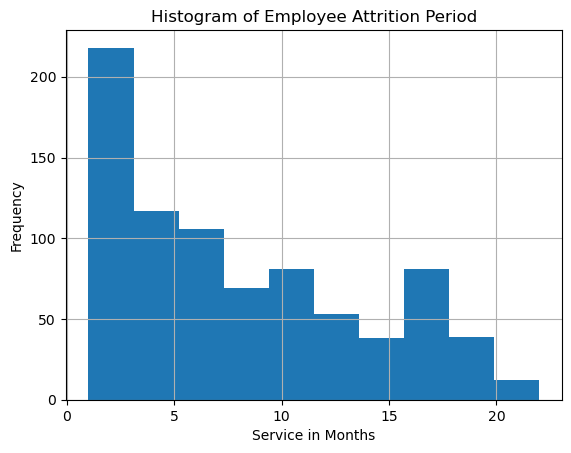

count    814.000000
mean       8.098280
std        5.537987
min        1.000000
25%        3.000000
50%        7.000000
75%       12.000000
max       22.000000
Name: Monthscount, dtype: float64

In [217]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot a histogram of the column
df_employee_final['Monthscount'].hist()

# Add labels and title
plt.xlabel('Service in Months')
plt.ylabel('Frequency')
plt.title('Histogram of Employee Attrition Period')

# Show the plot
plt.show()

df_employee_final['Monthscount'].describe()

In [224]:
#Eearly attrition field is introducted


df_employee_final['IsEarlyAttrition'] = np.where(df_employee_final['Monthscount'] > 6, 1, 0)
df_employee_final['Monthscount'].describe()

count    1261.000000
mean        5.314036
std         5.842893
min         0.000000
25%         0.000000
50%         3.000000
75%         9.000000
max        22.000000
Name: Monthscount, dtype: float64

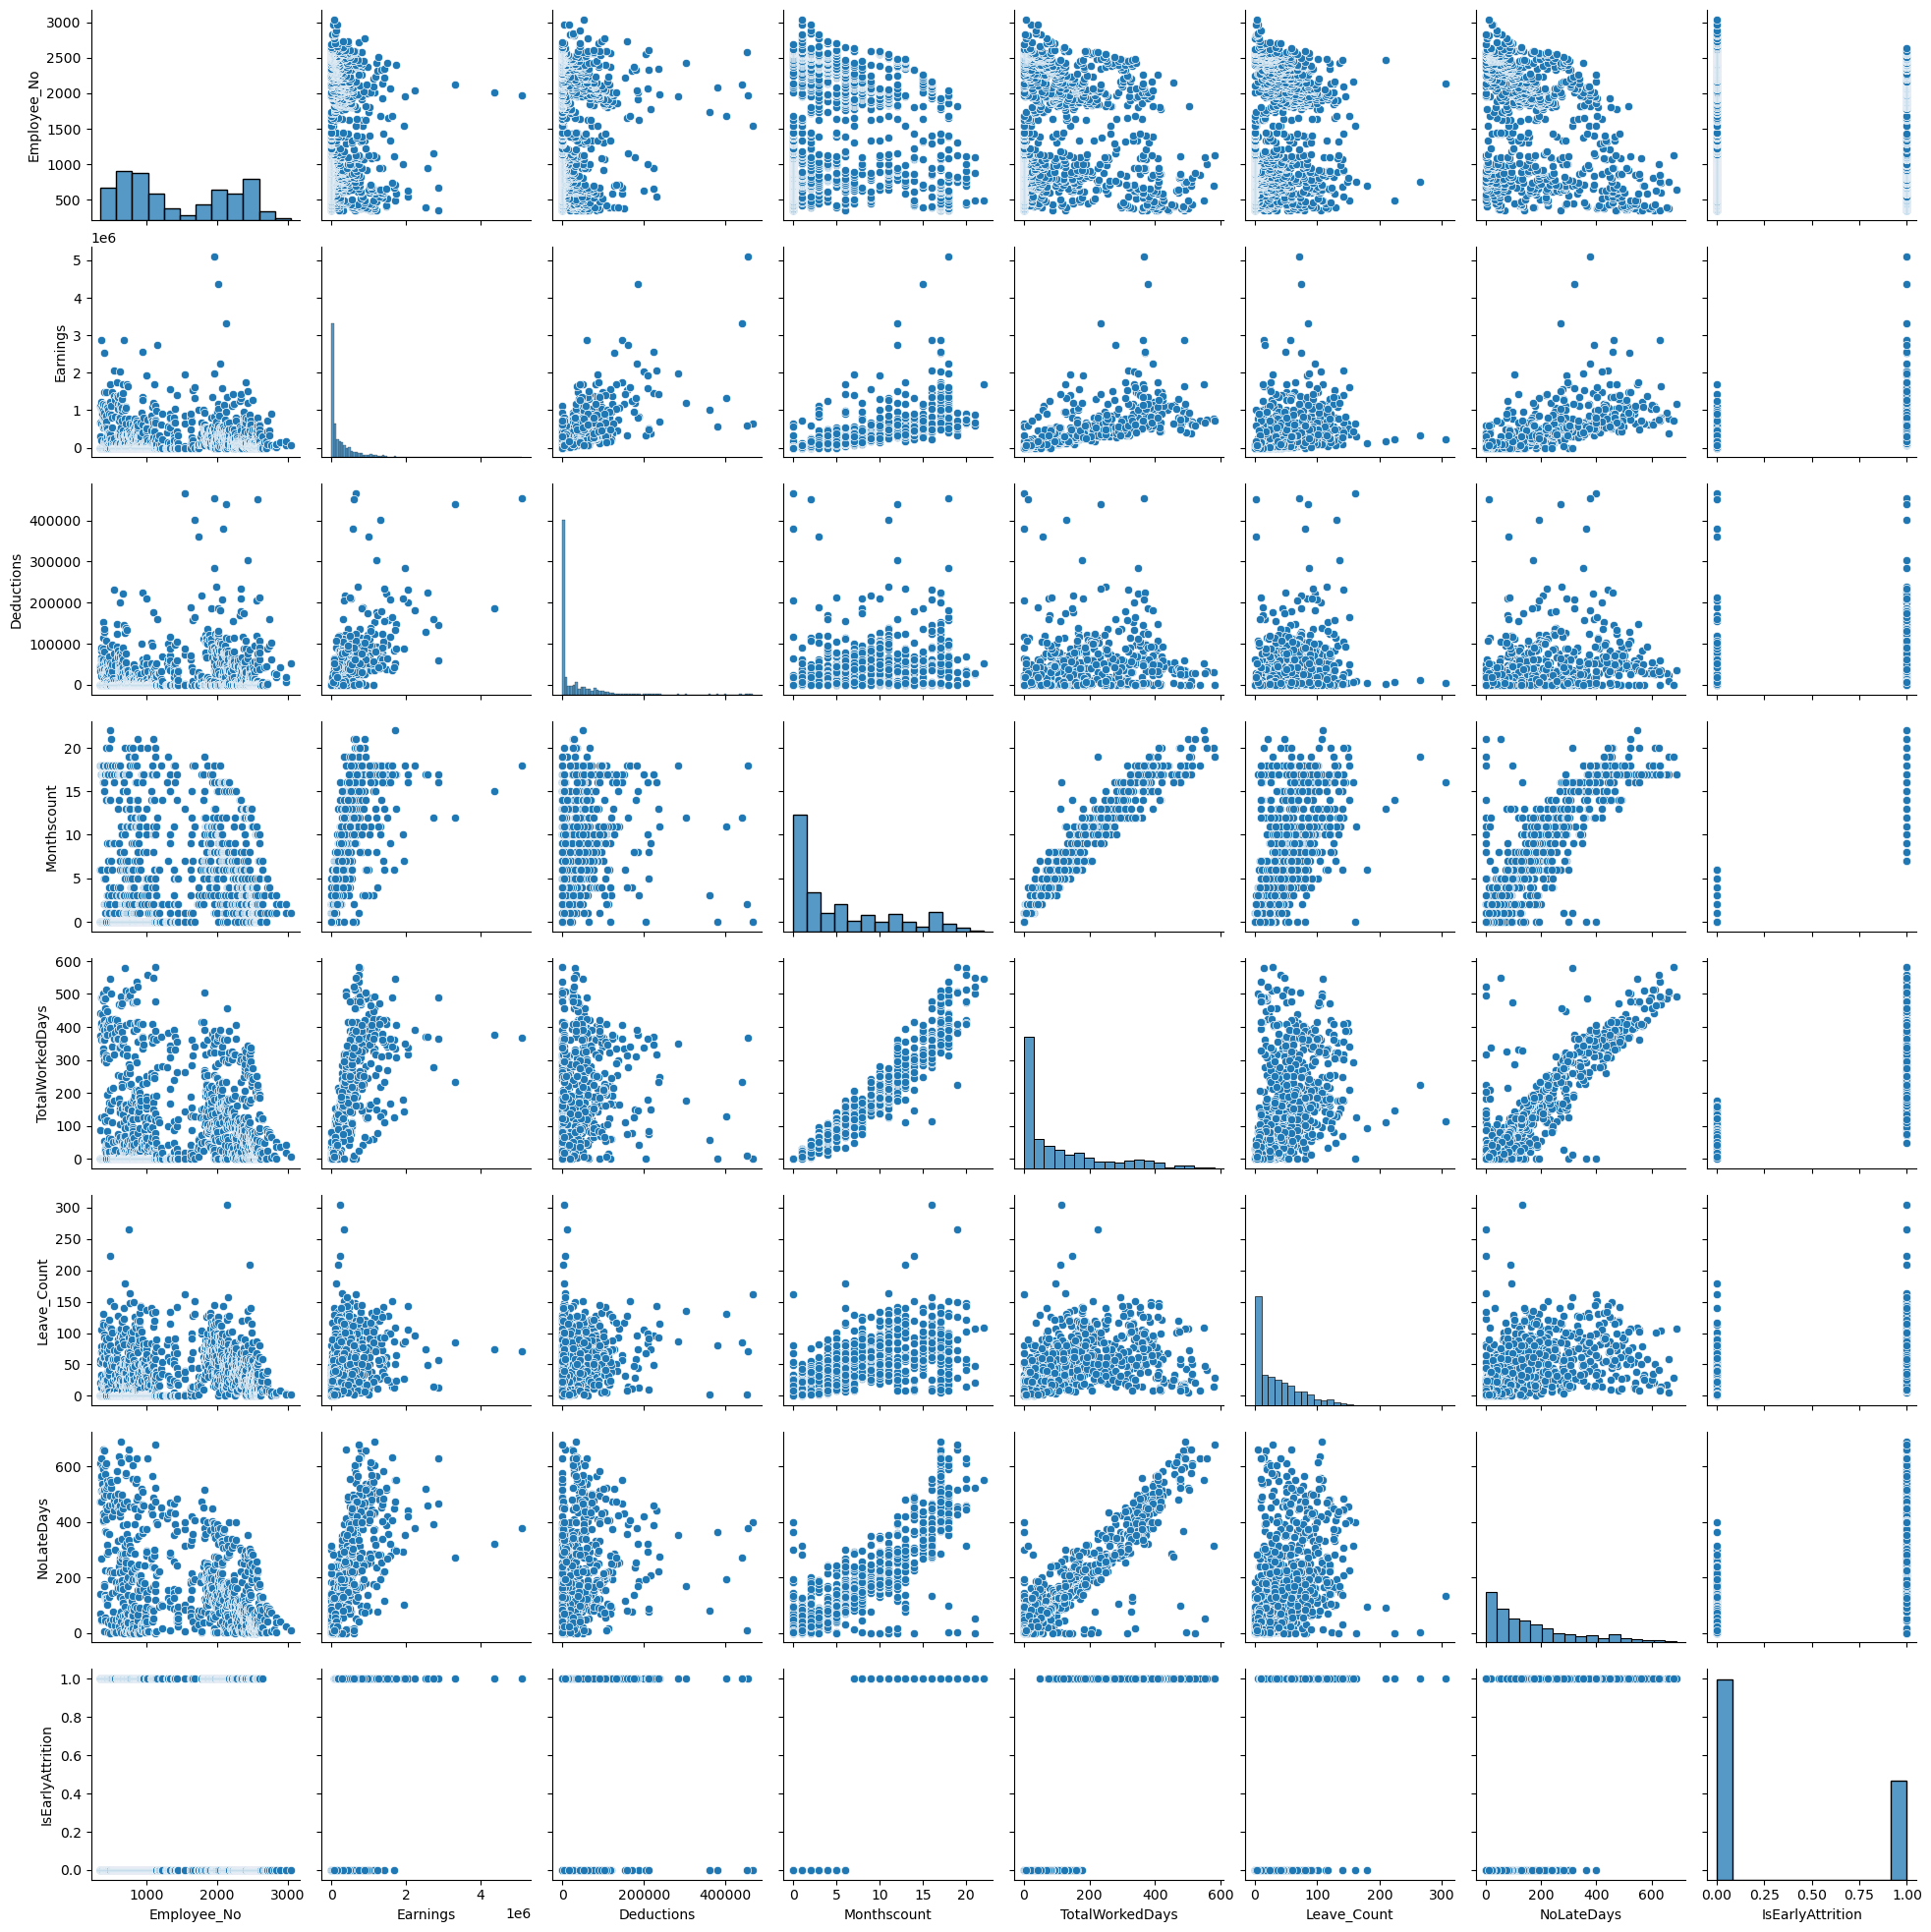

In [227]:
seaborn.pairplot(df_employee_final)